I  have  provided  a  dataset  which  has  a  number  of  features  and  a  single  target  (last  column  in  dataset).  Your  task  is  to  use neural  networks  to  address  this multiclass classification problem.  

Some  hints: 

1. Are the classes in order in the dataset? Does something need to be done about that? 

2. Is the scale of the dataset suitable as is?

Import the dataset using Pandas as follows:

## Importing modules

In [337]:
import numpy as np
np.random.seed(1)
import random
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.utils import class_weight as cw
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
from collections import Counter
%matplotlib inline

## Load the dataset

In [338]:
dataframe=pd.read_csv("https://drive.google.com/uc?id=1PzJA23lUSlf2x1DeF_ek1YSAj-RFHWCp")

## Check the data

In [339]:
dataframe.head() # checking the first 5 data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,Target
0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,-0.075622,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,0
1,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,-0.095004,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,0
2,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,-0.072827,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,0
3,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,-0.162258,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,0
4,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,-0.100749,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,0


In [340]:
dataframe.describe() # checking descrition of data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,Target
count,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000
mean,0.325149,0.250856,0.484763,0.157566,0.064476,-0.034676,0.027441,0.158756,0.044486,-0.144606,0.049033,0.167862,-0.047705,-0.113735,0.047191,0.102357,0.009344,-0.067307,-0.071956,0.051448,0.111858,1.884545
std,0.204522,0.243939,0.149252,0.150190,0.101864,0.171234,0.100768,0.186429,0.131958,0.196909,0.171561,0.226988,0.165983,0.208250,0.130303,0.150444,0.092064,0.082618,0.094601,0.080394,0.126817,0.989164
min,-0.500320,-0.436028,-0.472676,-0.447495,-0.313397,-0.538982,-0.576506,-0.513460,-0.518323,-0.901989,-0.799441,-0.644116,-0.565970,-0.717156,-0.498675,-0.421480,-0.759322,-0.680745,-0.361649,-0.430812,-0.375461,0.000000
25%,0.174858,0.096745,0.418656,0.106469,-0.001002,-0.140004,-0.018584,0.125626,-0.014899,-0.288113,-0.051382,-0.047151,-0.155606,-0.275271,-0.025788,-0.011130,-0.052096,-0.119219,-0.140703,-0.002805,0.022143,2.000000
50%,0.304040,0.210390,0.520782,0.180817,0.046851,-0.089144,0.034649,0.227751,0.045297,-0.214559,0.067512,0.260931,-0.072582,-0.201127,0.051501,0.161939,0.014949,-0.077523,-0.082641,0.049956,0.160371,2.000000
75%,0.451091,0.337773,0.575542,0.238215,0.107995,0.003196,0.086519,0.279041,0.112402,-0.033826,0.155289,0.344301,0.042184,0.076152,0.126679,0.216912,0.076296,-0.022659,-0.023184,0.105675,0.207754,2.000000
max,1.000000,1.000000,1.000000,0.752246,0.846513,0.696887,0.551762,0.642738,0.522768,0.523033,0.669470,0.945710,0.566873,0.668924,0.548584,0.681157,0.614064,0.388499,0.306126,0.389797,0.432207,4.000000


## Checking the length of data

In [341]:
len(dataframe) # length of data 

5474

## Spliting data into input(features) X and Y(Output) 

In [342]:
X=dataframe.iloc[:,0:21]
Y=dataframe.iloc[:,21:22]

## Checking Data after spliting 

In [343]:
Y # checking the target

,Target
0,0
1,0
2,0
3,0
4,0
...,...
5469,4
5470,4
5471,4
5472,4


In [344]:
X[:] # checking the features

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,-0.075622,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,-0.095004,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,-0.072827,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,-0.162258,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,-0.100749,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5469,0.454285,0.528052,0.347232,-0.025295,0.163605,0.036155,0.199822,0.157373,-0.229557,-0.035979,0.334718,-0.112638,-0.184094,0.240129,0.145780,-0.141104,-0.031898,0.068993,0.100330,-0.029206,-0.195860
5470,0.499699,0.541278,0.347802,0.004285,0.065125,-0.018636,0.073806,0.115698,-0.186969,-0.070244,0.302870,-0.026069,-0.095201,0.165905,0.118786,-0.067359,-0.033460,0.018610,0.045389,0.028269,-0.059700
5471,0.513238,0.454580,0.330268,0.068541,0.140244,0.047996,0.203753,0.196982,-0.177259,-0.064948,0.321550,-0.021530,-0.227525,0.089220,0.103636,-0.124573,-0.054100,0.028137,0.061191,0.057151,-0.095740
5472,0.428682,0.468821,0.391787,0.098071,0.157278,0.029464,0.092224,0.128838,-0.164522,-0.070393,0.227975,-0.003847,-0.101297,0.153508,0.058488,-0.097446,-0.014492,-0.009130,0.060755,0.023273,-0.138813


## Checking the data

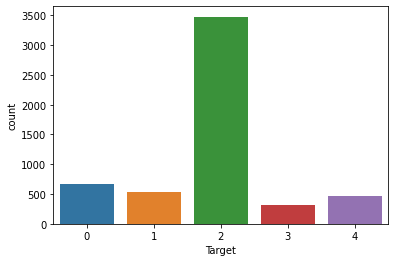

In [345]:
ax = sns.countplot(x="Target",data=Y) # plot of data classes

## Resampling the data(Undersampling class 2 )

In [346]:
w={0:672,1:542,2:900,3:310,4:472} # create dict to use for undersampling class 2
undersample = RandomUnderSampler(sampling_strategy =w) # undersample strategy
x_1, y_1 = undersample.fit_resample(X,Y) # undersample

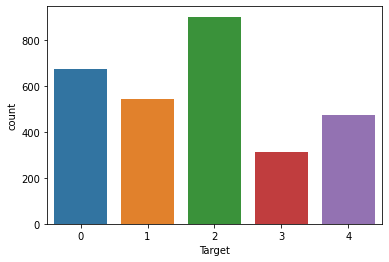

In [347]:
ax = sns.countplot(x="Target",data=y_1) # plot data class count after undersampling

I undersample class 2 from 3500 to 900 because having oversampled class 2 making giving me a fault high percentage , deceasing class 2 helps improve this

## Splitng data into train and test

In [348]:
x_train, x_test, y_train, y_test = train_test_split(x_1, y_1, test_size=0.25, random_state=1) # spliting data

## Checking the different classes of data

In [349]:
classes = np.unique(y_train) # checking different classes 
nClasses = len(classes) # 
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


## Checking data after spliting

In [350]:
x_train # checking x train 

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
2146,-0.122689,-0.108091,0.459278,0.324847,0.082324,0.021403,-0.046580,-0.020927,0.188985,0.087926,-0.197714,-0.111859,0.224716,0.187511,-0.069593,-0.143951,-0.030810,0.063506,0.113256,0.097072,-0.016272
1673,0.154098,0.190572,0.620477,0.281384,0.050890,-0.141847,0.005336,0.215225,-0.020324,-0.215157,0.130223,0.194686,-0.234842,-0.148398,0.247727,0.224171,-0.067433,-0.171925,-0.115284,0.102244,0.200412
2097,0.368272,0.303253,0.514853,0.177621,0.012508,-0.119172,0.004810,0.272645,0.024771,-0.324513,0.035810,0.299441,-0.126011,-0.269624,0.089161,0.205210,-0.001569,-0.058651,-0.115110,0.027263,0.155777
2480,0.748015,0.850014,0.409485,-0.050474,0.202607,0.009474,-0.037339,0.131029,-0.218542,-0.015965,0.316906,-0.129844,-0.185656,0.201886,0.028376,-0.143642,0.062813,0.093326,0.092764,0.043794,-0.037266
1790,0.301820,0.299521,0.570954,0.183203,0.072869,-0.076704,0.004918,0.207186,0.002290,-0.260925,0.127553,0.381763,-0.122591,-0.245886,0.146648,0.205198,-0.032448,-0.098426,-0.109385,0.071605,0.183288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,0.654525,0.614626,0.347933,-0.010778,0.129369,-0.010043,0.165358,0.232305,-0.193009,0.040046,0.418199,-0.091514,-0.188299,0.189963,0.020358,-0.167696,-0.047113,-0.035929,0.046322,0.006517,-0.141355
905,0.414315,0.274445,0.399073,0.094667,0.044919,0.115003,0.004487,-0.140676,0.015485,0.169606,-0.049158,-0.226537,0.136871,0.110162,-0.155411,-0.096111,0.056908,-0.018736,-0.094073,-0.024367,0.021566
1096,0.332626,0.151965,0.348874,0.087642,0.019653,0.076256,-0.000327,-0.048015,0.066553,0.135761,-0.074380,-0.182271,0.138697,0.198772,-0.064840,-0.066783,0.054513,-0.030771,-0.098311,-0.014890,-0.018031
235,0.339049,-0.001276,0.075088,0.298091,0.190639,0.022295,0.049216,0.175380,-0.007751,-0.252298,-0.198813,0.198647,0.445917,0.249543,-0.161598,-0.299407,-0.121592,0.108062,0.124870,-0.004888,-0.040086


## checking maximum

In [351]:
np.max(x_train)

1     1.000000
2     1.000000
3     1.000000
4     0.752246
5     0.579032
6     0.696887
7     0.551762
8     0.642738
9     0.478224
10    0.523033
11    0.669470
12    0.945710
13    0.566873
14    0.668924
15    0.493691
16    0.432527
17    0.614064
18    0.388499
19    0.306126
20    0.389797
21    0.432207
dtype: float64

##Convert from categorical labels to one-hot encoded vectors

In [352]:
y_train = np_utils.to_categorical(y_train) # one hot encoding on both y train and y test
y_test = np_utils.to_categorical(y_test)

## Checking data after one hot encoded

In [353]:
y_train # check y train

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [354]:
y_test # check y test 

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

# creating validation data

In [355]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3,random_state=1) # spliting into validation data 

# Checking the shape after making validation data

In [356]:
x_train.shape

(1520, 21)

In [357]:
x_test.shape

(724, 21)

In [358]:
y_test.shape

(724, 5)

In [359]:
y_train.shape

(1520, 5)

In [360]:
x_val.shape

(652, 21)

In [361]:
y_val.shape

(652, 5)

##Create a neural network model

In [362]:
def baseline():
  # create model
    model = Sequential()
    model.add(Dense(45, input_dim=21, activation='linear'))
    # add one fully connected layer
    model.add(Dense(30, activation='relu'))
    # add one fully connected layer
    model.add(Dense(15, activation='relu'))
    # add one fully connected layer
    model.add(Dense(10, activation='linear'))        
    # add one fully connected layer
    model.add(Dense(5, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

##  Initialise the model

In [363]:
model = baseline()

## Determine the number of trainable parameters

In [364]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 45)                990       
                                                                 
 dense_61 (Dense)            (None, 30)                1380      
                                                                 
 dense_62 (Dense)            (None, 15)                465       
                                                                 
 dense_63 (Dense)            (None, 10)                160       
                                                                 
 dense_64 (Dense)            (None, 5)                 55        
                                                                 
Total params: 3,050
Trainable params: 3,050
Non-trainable params: 0
_________________________________________________________________


## Begin training

In [365]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val) ,epochs = 25)

Epoch 1/25
48/48 [==============================] - 1s 7ms/step - loss: 1.3353 - accuracy: 0.5296 - val_loss: 0.9744 - val_accuracy: 0.7715
Epoch 2/25
48/48 [==============================] - 0s 3ms/step - loss: 0.7554 - accuracy: 0.7737 - val_loss: 0.5268 - val_accuracy: 0.7945
Epoch 3/25
48/48 [==============================] - 0s 3ms/step - loss: 0.4758 - accuracy: 0.8250 - val_loss: 0.3647 - val_accuracy: 0.8819
Epoch 4/25
48/48 [==============================] - 0s 3ms/step - loss: 0.3392 - accuracy: 0.8987 - val_loss: 0.2595 - val_accuracy: 0.9264
Epoch 5/25
48/48 [==============================] - 0s 3ms/step - loss: 0.2609 - accuracy: 0.9283 - val_loss: 0.2123 - val_accuracy: 0.9479
Epoch 6/25
48/48 [==============================] - 0s 3ms/step - loss: 0.2120 - accuracy: 0.9441 - val_loss: 0.1760 - val_accuracy: 0.9525
Epoch 7/25
48/48 [==============================] - 0s 3ms/step - loss: 0.1777 - accuracy: 0.9493 - val_loss: 0.1580 - val_accuracy: 0.9540
Epoch 8/25
48/48 [==

## Predict on the test data

In [366]:
prediction = model.predict(x_test) # create predication data from test data

In [367]:
prediction # check prediction data

array([[5.2360640e-08, 2.3640955e-06, 2.2144352e-04, 9.9977618e-01,
        2.1725359e-08],
       [2.4219823e-10, 1.0070390e-08, 9.9921954e-01, 7.7506999e-04,
        5.3973522e-06],
       [2.2811808e-08, 1.6504488e-07, 9.9808854e-01, 1.8128866e-03,
        9.8315257e-05],
       ...,
       [2.4468851e-09, 6.9343159e-08, 9.9868590e-01, 1.2934700e-03,
        2.0476629e-05],
       [9.9629200e-01, 9.8454948e-05, 7.9183572e-08, 1.2789459e-04,
        3.4814919e-03],
       [1.3955270e-10, 3.1434129e-09, 9.9988794e-01, 9.9597251e-05,
        1.2339885e-05]], dtype=float32)

In [368]:
prediction_classes = np.argmax(prediction, axis=1) #

## Compute the accuracy

In [369]:
confusion_matrix(np.argmax(y_test,1), prediction_classes) # checking confusion matrix

array([[159,   0,   0,   4,   5],
       [  0, 133,   0,   0,   0],
       [  1,   0, 234,   1,   1],
       [  3,   2,   2,  64,   0],
       [  1,   0,   0,   0, 114]])

In [370]:
accuracy_score(np.argmax(y_test,1), prediction_classes)

0.9723756906077348

# Creating plot

In [371]:
def plot_hist(h, xsize=6, ysize=10):

    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True)
    
    # summarize history for Accuracy
    plt.subplot(211)
    plt.plot(h['accuracy'])
    plt.plot(h['val_accuracy'])
    plt.title('Training Performance')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='best')
    
    plt.draw()
    plt.show()

    return

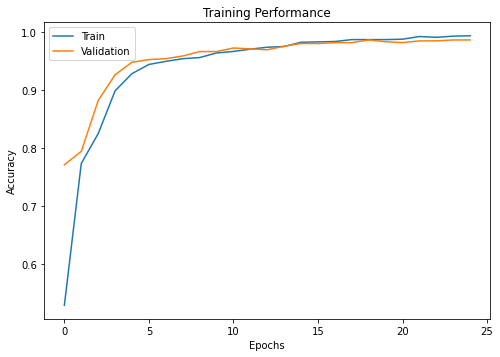

In [372]:

plot_hist(history.history, xsize=8, ysize=12)

Class 3 is the class with the most wrong predictions because with had the less data about it and class 2 has the best prediction beacause we had the most data on it. I did not make all the classes equal because i would have loss of data about the other classes despite the fact that i would have got a higher accuarcy at the end  